#1 Calcular a média de quartos por aparamentos:

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [3]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [4]:
df['Quartos'].mean()

2.481568707761622

#2 Verificar quantos bairros únicos existem na nossa base de dados:

In [5]:
len(df['Bairro'].unique())

149

In [6]:
df['Bairro'].nunique()

149

#3 Examinar bairros que possuem a média de valor de aluguel mais caros.

In [7]:
df.groupby('Bairro')[['Valor']].mean().sort_values('Valor')

,Valor
Bairro,
Ricardo de Albuquerque,340.000000
Paciência,510.000000
Santa Cruz,590.000000
Cosmos,610.000000
Inhoaíba,650.000000
...,...
Botafogo,9369.207116
Ipanema,9487.205317
Cidade Jardim,12000.000000


#4 Montar um gráfico com barras veriticais que mostre os 5 bairros junto com média de valores de aluguel mais elevados


In [8]:
df.groupby('Bairro')[['Valor']].mean().sort_values('Valor').head()

,Valor
Bairro,
Ricardo de Albuquerque,340.0
Paciência,510.0
Santa Cruz,590.0
Cosmos,610.0
Inhoaíba,650.0


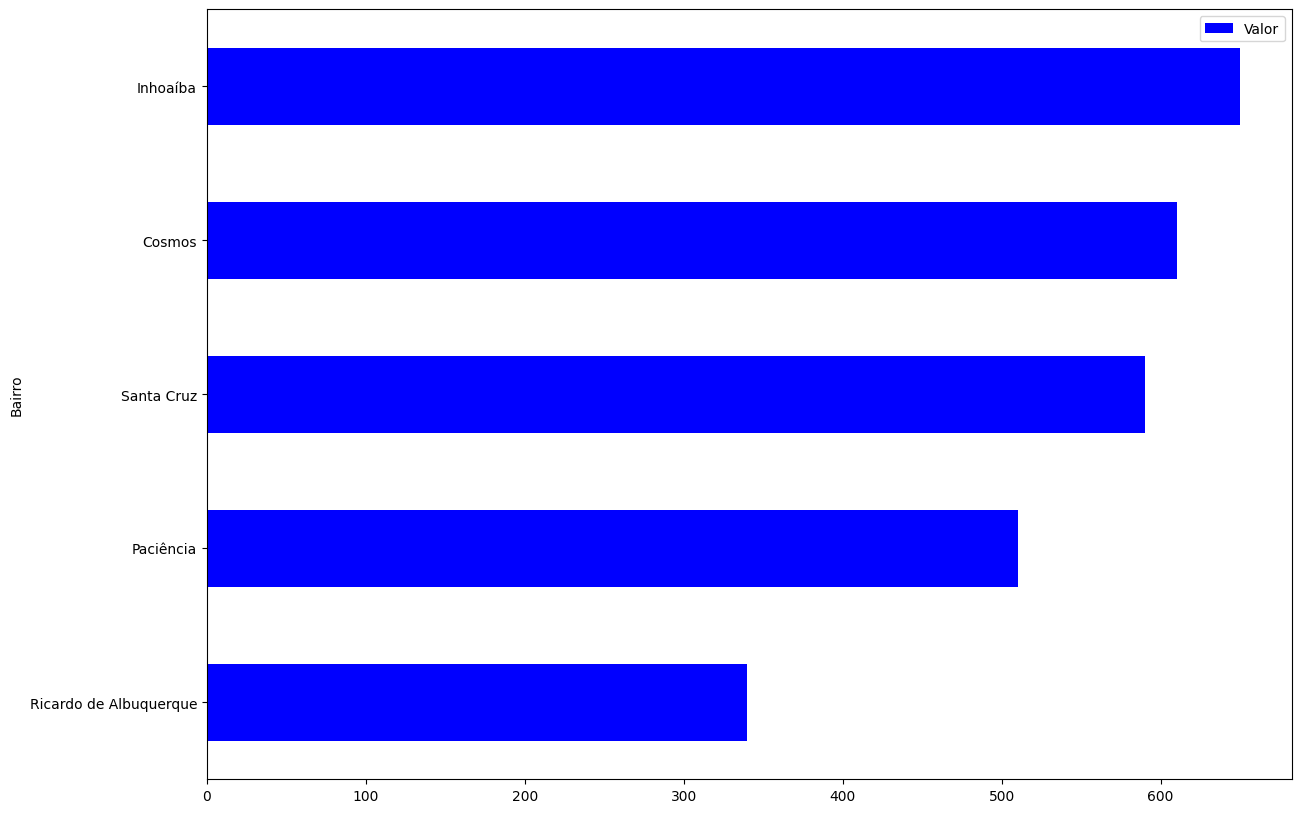

In [9]:
df_bairros = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor').head()

df_bairros.plot(kind='barh', figsize=(14,10), color='blue');